In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import chainer

# import datas

In [4]:
df_train_val = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [5]:
type(df_train_val)

pandas.core.frame.DataFrame

In [6]:
df_train_val.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_train_val.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


# create dataset

- objective

Ma]king the list including the datas that composed of tuple between feature and label.
```
def create_dataset(df, is_test = False):
  dataset = []
  for index, row in df.iterrows():
      feature = row.iloc[1:].values.astype("float32") / 255.0
      label = row[0].astype("int32")
      data = (feature, label)
      dataset.append(data)
  return dataset
```

```
for index, row in df.iterrows():
```
ここでは、`df.itterrows()`によって、indexとvaluesを返す。<br>
以下では、1番目と2番目のサンプルを抽出してみる。

In [16]:
count = 0
for index, row in df_train_val.iterrows():
    if index != 2:
        print("index: {}".format(index))
        print("row (type:{})".format(type(row)))
        print(row)
        print("-----------------"*2)
    else:
        break

index: 0
row (type:<class 'pandas.core.series.Series'>)
label       1
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 785, dtype: int64
----------------------------------
index: 1
row (type:<

```
feature = row.iloc[1:].values.astype("float32") / 255.0
label = row[0].astype("int32")
data = (feature, label)
```

- Chainerに則したデータセットを作る
    - dataset[i]などとするとi番目の (data, label) というタプルを返すリストになっていること。
    - dataはfloat32型、labelはint32型であること。
    - 元画素値が0~255のint値だが、それを0~1のfloat値になるようにスケールすること。

In [19]:
for index, row in df_train_val.iterrows():
    if index != 1:
        print("row.iloc[1:].values (type: {}".format(type(row.iloc[1:].values)))
        print(row.iloc[1:].values)
        print("row.iloc[1:].values.astype('float32') / 255.0")
        print(row.iloc[1:].values.astype("float32") / 255.0)
    else:
        break

row.iloc[1:].values (type: <class 'numpy.ndarray'>
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 188 255  94   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250 253
  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 123 248 253 167  10   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80 247 253
 208  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0


In [17]:
def create_dataset(df, is_test = False):
  dataset = []
  for index, row in df.iterrows():
      feature = row.iloc[1:].values.astype("float32") / 255.0
      label = row[0].astype("int32")
      data = (feature, label)
      dataset.append(data)
  return dataset

In [20]:
train_val = create_dataset(df_train_val)

In [21]:
len(df_train_val)

42000

In [22]:
len(train_val)

42000

- トレーニング用と検証用に分割

In [28]:
train_size = 30000
train, validation = chainer.datasets.split_dataset_random(train_val, train_size, seed=0)

In [29]:
len(train)

30000

In [32]:
print("type: {}".format(type(train)))

type: <class 'chainer.datasets.sub_dataset.SubDataset'>


# model の定義

In [36]:
import chainer.functions as F
import chainer.links as L

class MyConvNet(chainer.Chain):
    def __init__(self):
        super(MyConvNet, self).__init__()
        with self.init_scope():
            self.conv1 = L.Convolution2D(
                in_channels=None, out_channels=32, ksize=3, stride=1, pad=1)
            self.conv2 = L.Convolution2D(
                in_channels=None, out_channels=64, ksize=3, stride=1, pad=1)
            self.conv3 = L.Convolution2D(
                in_channels=None, out_channels=128, ksize=3, stride=1, pad=1)
            self.conv4 = L.Convolution2D(
                in_channels=None, out_channels=128, ksize=3, stride=1, pad=1)
            self.fc5 = L.Linear(None, 2000)
            self.fc6 = L.Linear(None, 1000)
            self.fc7 = L.Linear(None, 500)
            self.fc8 = L.Linear(None, 10)

    def __call__(self, x):
        h = F.dropout(F.relu(self.conv1(x.reshape((-1, 1, 28, 28)))), ratio=0.2)
        h = F.max_pooling_2d(h, ksize=2, stride=2)
        h = F.dropout(F.relu(self.conv2(h)), ratio=0.2)
        h = F.max_pooling_2d(h, ksize=2, stride=2)
        h = F.dropout(F.relu(self.conv3(h)), ratio=0.2)
        h = F.max_pooling_2d(h, ksize=2, stride=2)
        h = F.dropout(F.relu(self.conv4(h)))
        h = F.dropout(F.relu(self.fc5(h)))
        h = F.dropout(F.relu(self.fc6(h)))
        h = F.dropout(F.relu(self.fc7(h)))
        return self.fc8(h)

In [37]:
from chainer import optimizers, training
from chainer.training import extensions

def  train_and_validate(model, optimizer, train, validation, n_epoch, batchsize, device=0):

    # 1. deviceがgpuであれば、gpuにモデルのデータを転送する
    if device >= 0:
        model.to_gpu(device)

    # 2. Optimizerを設定する
    optimizer.setup(model)

    # 3. DatasetからIteratorを作成する
    train_iter = chainer.iterators.SerialIterator(train, batchsize)
    validation_iter = chainer.iterators.SerialIterator(
        validation, batchsize, repeat=False, shuffle=False)

    # 4. Updater・Trainerを作成する
    updater = training.StandardUpdater(train_iter, optimizer, device=device)
    trainer = chainer.training.Trainer(updater, (n_epoch, 'epoch'), out='out')

    # 5. Trainerの機能を拡張する
    trainer.extend(extensions.LogReport())
    trainer.extend(extensions.Evaluator(validation_iter, model, device=device), name='val')
    trainer.extend(extensions.PrintReport(
        ['epoch', 'main/loss', 'main/accuracy', 'val/main/loss', 'val/main/accuracy', 'elapsed_time']))
    trainer.extend(extensions.PlotReport(
        ['main/loss', 'val/main/loss'],x_key='epoch', file_name='loss.png'))
    trainer.extend(extensions.PlotReport(
        ['main/accuracy', 'val/main/accuracy'], x_key='epoch', file_name='accuracy.png'))
    trainer.extend(extensions.dump_graph('main/loss'))

    # 6. 訓練を開始する
    trainer.run()

# Train

In [38]:
device = -1
n_epoch = 10
batchsize = 128

model = MyConvNet()
classifier_model = L.Classifier(model)
optimizer = optimizers.Adam()
train_and_validate(classifier_model, optimizer, train, validation, n_epoch, batchsize, device)

epoch       main/loss   main/accuracy  val/main/loss  val/main/accuracy  elapsed_time
1           0.506578    0.826895       0.140542       0.97141            402.931       
2           0.125822    0.964009       0.0694802      0.981715           850.683       
3           0.0936851   0.973238       0.0751631      0.978973           1274.92       
4           0.0806252   0.977564       0.065734       0.984209           1649.69       
5           0.0701593   0.980869       0.0660407      0.982962           2029.2        
6           0.0682486   0.982547       0.0599071      0.98468            2420.71       
7           0.0565437   0.984342       0.0724353      0.980386           2827.27       
8           0.0527274   0.986011       0.0591296      0.985511           3133.4        
9           0.0539969   0.985971       0.0553246      0.985705           3461.31       
10          0.0482726   0.986879       0.0455693      0.988752           3832.73       


In [45]:
from IPython.display import Image, display
def show_loss_and_accuracy():
    display(Image(filename='out/loss.png'))
    display(Image(filename='out/accuracy.png'))

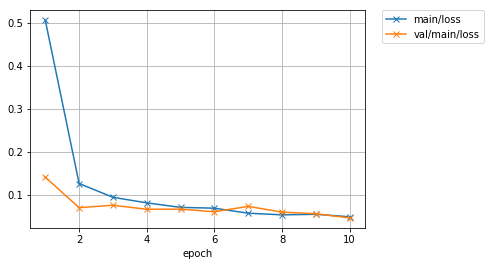

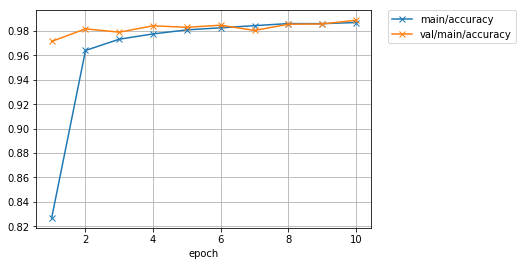

In [46]:
show_loss_and_accuracy()